### Visualizing the distribution of the observations

### Load the required libraries

In [1]:
sc.stop()

NameError: name 'sc' is not defined

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
%pylab inline

import findspark
findspark.init()

from pyspark import SparkContext
#sc.stop()
sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStats.py'])
#sc = SparkContext(master="local[3]",pyFiles=['lib/numpy_pack.py','lib/computeStats.py'])
from pyspark import SparkContext
from pyspark.sql import *
sqlContext = SQLContext(sc)

import sys
sys.path.append('./lib')

import numpy as np
from numpy_pack import packArray,unpackArray
#from spark_PCA import computeCov
from computeStats import computeOverAllDist, STAT_Descriptions

### Read the data frame from pickle file

data_dir='../../Data/Weather'
file_index='BSSSBSBS'

from pickle import load

#read statistics
filename=data_dir+'/STAT_%s.pickle'%file_index
STAT,STAT_Descriptions = load(open(filename,'rb'))
print 'keys from STAT=',STAT.keys()

#read data
filename=data_dir+'/US_Weather_%s.parquet'%file_index
df=sqlContext.read.parquet(filename)

#filename=data_dir+'/US_Weather_%s.csv'%file_index
#df = sqlContext.read.load(filename, format="csv",header = False)

print df.count()
df.show(5)

Populating the interactive namespace from numpy and matplotlib
keys from STAT= ['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']
12249
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|elevation|latitude|longitude|measurement|    station|undefs|              vector|  year|   label|
+---------+--------+---------+-----------+-----------+------+--------------------+------+--------+
|     14.9| 30.4132| -86.6635|       PRCP|US1FLOK0014|    38|[00 00 00 00 B0 5...|2009.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|     5|[40 5A F0 5A 80 5...|1999.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|     3|[20 5B 78 5B 48 5...|2000.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|    40|[90 55 E0 54 A0 5...|2001.0|BSSSBSBS|
|      6.4| 30.2119| -85.6828|       TMAX|USW00003882|    12|[E0 54 30 54 30 5...|2002.0|BSSSBSBS|
+---------+--------+---------+-----------+-----------+------+-------------

### Select data for a particular station and measurement type

In [2]:
sqlContext.registerDataFrameAsTable(df,'weather')
data=[]
#Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX','USC00198301')
for i in range(len(stats)):
    Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TOBS',stats[i])
    print Query
    df1 = sqlContext.sql(Query)
    print df1.count(),'rows'
    #df1.show(2)
    rows1=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()
    data=data+rows1

NameError: name 'stats' is not defined

In [ ]:
sqlContext.registerDataFrameAsTable(df,'weather')
#Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX','USC00198301')
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX',stats[12])
print Query
df1 = sqlContext.sql(Query)
print df1.count(),'rows'
df1.show(2)
rows2=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect()

In [ ]:
sqlContext.registerDataFrameAsTable(df,'weather')
#Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX','USC00198301')
Query="SELECT * FROM weather\n\tWHERE measurement='%s' and station='%s'"%('TMAX','USW00003882')
print Query
df1 = sqlContext.sql(Query)
print df1.count(),'rows'
df1.show(2)
rows=df1.rdd.map(lambda row:unpackArray(row['vector'],np.float16)).collect() #takes byte arrary and returns np array
T=np.vstack(rows)
T=T/10.  # scaling to make the temperature be in centingrates
shape(T)

In [3]:
Mobile_TOBS_df_y=pd.DataFrame(data)
Mobile_TOBS_mean_y=np.nanmean(Mobile_TOBS_df_y,axis=0)
Mobile_TOBS_mean_y=((Mobile_TOBS_mean_y/10.)+32)*1.8

In [4]:
Mobile_TOBS_df=pd.DataFrame(data)
Mobile_TOBS_mean=np.nanmean(Mobile_TOBS_df,axis=0)
Mobile_TOBS_mean=((Mobile_TOBS_mean/10.)+32)*1.8

In [5]:
Mobile_TMIN_df=pd.DataFrame(data)
Mobile_TMIN_mean=np.nanmean(Mobile_TMIN_df,axis=0)
Mobile_TMIN_mean=((Mobile_TMIN_mean/10.)+32)*1.8

In [6]:
Mobile_TMAX_df=pd.DataFrame(data)

In [7]:
Mobile_TMAX_mean=np.nanmean(Mobile_TMAX_df,axis=0)

In [8]:
Mobile_TMAX_mean=((Mobile_TMAX_mean/10.)+32)*1.8

In [9]:
mean(Mobile_TMAX_mean)

/Users/laurawilke/anaconda3/envs/py27_2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/laurawilke/anaconda3/envs/py27_2/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

### Script for plotting yearly plots

In [ ]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
data=vstack([Mobile_TMAX_mean,Mobile_TOBS_mean, Mobile_TMIN_mean]).transpose()
YP.plot(data,fig,ax,title='Mobile Mean Temperature')
#title('A sample of graphs');

### Distribution of missing observations
The distribution of missing observations is not uniform throughout the year. We visualize it below.

In [ ]:
def plot_pair(pair,func):
    j=0
    fig,X=subplots(1,2,figsize=(16,6))
    axes=X.reshape(2)
    for m in pair:
        axis = axes[j]
        j+=1
        func(m,fig,axis)
        
def plot_valid(m,fig,axis):
    valid_m=STAT[m]['NE']
    YP.plot(valid_m,fig,axis,title='valid-counts '+m)
    

In [ ]:
plot_pair(['TMIN','TMAX'],plot_valid)

In [ ]:
plot_pair(['TOBS','PRCP'],plot_valid)

In [ ]:
plot_pair(['SNOW', 'SNWD'],plot_valid)

### Plots of mean and std of observations

In [ ]:
def plot_mean_std(m,fig,axis):
    mean=(((STAT[m]['Mean'])/10.)+32)*1.8
    std=np.sqrt(STAT[m]['Var'])
    graphs=np.vstack([mean-std,mean,mean+std]).transpose()
    YP.plot(graphs,fig,axis,title='Mean+-std   '+m)

In [ ]:
def plot_mean(m,fig,axis):
    mean=(((STAT[m]['Mean'])/10.)+32)*1.8
    graphs=mean.transpose()
    YP.plot(graphs,fig,axis,title='Mean '+m)

In [ ]:
mean((((STAT['TOBS']['Mean'])/10.)+32)*1.8)

In [ ]:
plot_pair(['TOBS','TMAX'],plot_mean)

In [ ]:
plot_pair(['TOBS','TMAX'],plot_mean_std)

In [ ]:
plot_pair(['TOBS','PRCP'],plot_mean_std)

In [ ]:
plot_pair(['SNOW', 'SNWD'],plot_mean_std)

### plotting top 3 eigenvectors

In [4]:
def plot_eigen(m,fig,axis):
    EV=STAT[m]['eigvec']
    YP.plot(EV[:,:3],fig,axis,title='Top Eigenvectors '+m)

In [5]:
plot_pair(['TMIN','TMAX'],plot_eigen)

NameError: name 'plot_pair' is not defined

In [6]:
plot_pair(['TOBS','PRCP'],plot_eigen)

NameError: name 'plot_pair' is not defined

In [7]:
plot_pair(['SNOW', 'SNWD'],plot_eigen)

NameError: name 'plot_pair' is not defined

### Script for plotting percentage of variance explained

In [8]:
def pltVarExplained(j):
    subplot(1,3,j)
    EV=STAT[m]['eigval']
    k=5
    plot(([0,]+list(cumsum(EV[:k])))/sum(EV))
    title('Percentage of Variance Explained for '+ m)
    ylabel('Percentage of Variance')
    xlabel('# Eigenvector')
    grid()
    

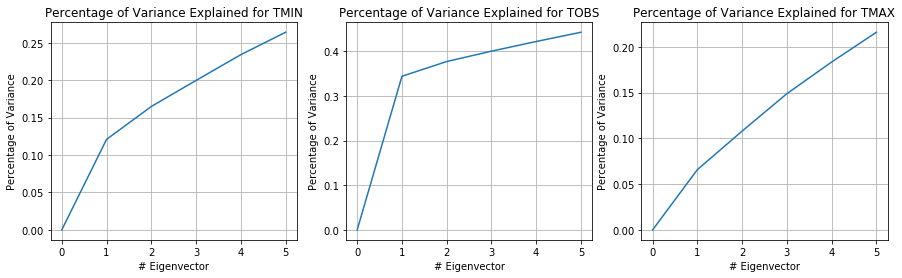

In [9]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['TMIN', 'TOBS', 'TMAX']: #,
    pltVarExplained(j)
    j+=1

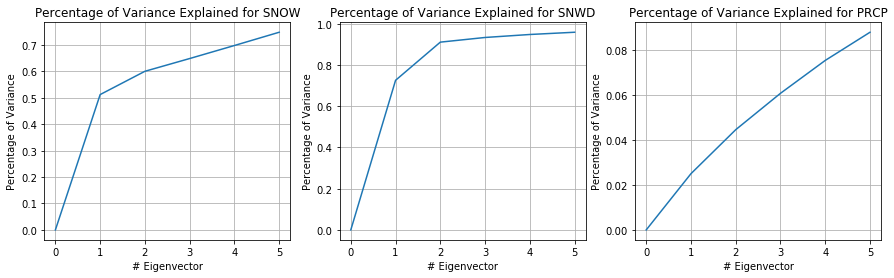

In [10]:
f=plt.figure(figsize=(15,4))
j=1
for m in ['SNOW', 'SNWD', 'PRCP']:
    pltVarExplained(j)
    j+=1 

In [11]:
#sc.stop()

In [12]:
stations=df.select(df['station'],df['latitude'],df['longitude']).collect()

In [13]:
n_stations=set(stations)
n_stations=list(n_stations)

In [14]:
stations_df=pd.DataFrame(n_stations, columns=['station','latitude','longitude'])
stations_df

,station,latitude,longitude
0,USC00086836,30.1667,-85.7000
1,USC00016937,31.3500,-86.5333
2,USC00016942,31.3667,-86.5167
3,US1FLOK0019,30.3891,-86.4577
4,USC00015875,31.3458,-85.6228
5,US1FLES0010,30.5000,-87.1894
6,USC00010252,31.3072,-86.5225
7,USC00080531,30.1667,-85.7167
8,US1ALWS0001,31.5095,-87.9600
9,USC00086842,30.2492,-85.6606


In [15]:
max(stations_df['latitude'])

31.525300000000001

In [16]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

In [17]:
min_lat,max_lat,min_long,max_long = box = (min(stations_df['latitude']), 
                                           max(stations_df['latitude']), 
                                           min(stations_df['longitude']), 
                                           max(stations_df['longitude']))

In [18]:
box

(30.066700000000001, 31.525300000000001, -88.5, -85.582400000000007)

In [107]:
min_lat,max_lat,min_long,max_long = box = (30.51, 
                                           30.79, 
                                           -88.3, 
                                           -87.97)

In [266]:
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
print center
zoom = 9

m = Map(default_tiles=TileLayer(opacity=1.0), center=center, zoom=zoom)

r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
circles = []
for index,row in stations_df.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    #_count=row['count(station)']
    #_coef=row[_avg]
    # taking sqrt of count so that the  area of the circle corresponds to the count
    c = Circle(location=(_lat,_long), radius=int(300*np.sqrt(6+0.0)), weight=1,
            color='#F00', opacity=0.8, fill_opacity=0.4)
    circles.append(c)
    m.add_layer(c)
m    

[30.65, -88.13499999999999]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


KeyboardInterrupt: 

In [286]:
Mobile=stations_df[(stations_df['longitude']<=-87.97) & (stations_df['longitude']>=-88.3)
           &(stations_df['latitude']>=30.51) &(stations_df['latitude']<=30.79)]

In [287]:
(30.79-30.51)*abs(-87.97+-88.3)

49.35559999999957

In [288]:
Mobile_stat=Mobile['station']

In [289]:
Mobile.groupby(['station'],as_index=True)['year'].max()

KeyError: 'Column not found: year'

In [290]:
stats=Mobile_stat.tolist()

In [291]:
stats

[u'US1ALMB0047',
 u'US1ALMB0035',
 u'US1ALMB0056',
 u'USW00013838',
 u'US1ALMB0050',
 u'US1ALMB0004',
 u'US1ALMB0049',
 u'US1ALMB0044',
 u'US1ALMB0037',
 u'US1ALMB0024',
 u'US1ALMB0017',
 u'US1ALMB0001',
 u'USW00013894',
 u'US1ALMB0042',
 u'USC00017733',
 u'US1ALMB0010',
 u'US1ALMB0023',
 u'USC00015483',
 u'US1ALMB0016',
 u'US1ALMB0011']

In [150]:
Mobile_data=pd.DataFrame
for i in range(len(stats)):
    a=df_DF[df_DF['station']==stats[i]]
    if i==0:
        Mobile_data=a
    else:
        Mobile_data=pd.concat([Mobile_data,a])

In [151]:
Mobile_data

,elevation,latitude,longitude,measurement,station,undefs,vector,year,label
7624,14.9,30.6808,-88.0888,PRCP,US1ALMB0047,13,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",2008.0,BSSSBSBS
7625,14.9,30.6808,-88.0888,PRCP,US1ALMB0047,4,"[0, 0, 0, 0, 0, 0, 16, 88, 0, 66, 0, 0, 80, 89...",2009.0,BSSSBSBS
7626,14.9,30.6808,-88.0888,PRCP,US1ALMB0047,5,"[0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80...",2010.0,BSSSBSBS
7627,14.9,30.6808,-88.0888,PRCP,US1ALMB0047,5,"[96, 85, 64, 83, 0, 0, 0, 0, 4, 92, 0, 77, 0, ...",2011.0,BSSSBSBS
11392,14.9,30.6808,-88.0888,SNOW,US1ALMB0047,19,"[0, 126, 0, 126, 0, 126, 0, 126, 0, 126, 0, 12...",2008.0,BSSSBSBS
6108,45.1,30.6596,-88.2124,PRCP,US1ALMB0035,27,"[80, 84, 48, 86, 0, 0, 0, 0, 192, 84, 232, 88,...",2011.0,BSSSBSBS
7635,41.5,30.6686,-88.1667,PRCP,US1ALMB0056,30,"[0, 126, 0, 126, 0, 126, 0, 0, 0, 0, 0, 0, 0, ...",2010.0,BSSSBSBS
7636,41.5,30.6686,-88.1667,PRCP,US1ALMB0056,35,"[0, 126, 0, 126, 0, 126, 0, 126, 136, 91, 0, 7...",2011.0,BSSSBSBS
481,7.9,30.6264,-88.0681,TMAX,USW00013838,1,"[240, 86, 232, 89, 16, 90, 152, 90, 72, 91, 16...",1949.0,BSSSBSBS
482,7.9,30.6264,-88.0681,TMAX,USW00013838,2,"[152, 90, 240, 90, 240, 90, 120, 91, 72, 91, 7...",1950.0,BSSSBSBS


In [189]:
Mobile_TMAX=Mobile_data[Mobile_data['measurement']=='TMIN']

In [190]:
temp=Mobile_TMAX['vector'].tolist()

In [191]:
temp=np.float64(temp)

ValueError: First dimension of T should be 365. Shape(T)=(730, 2)

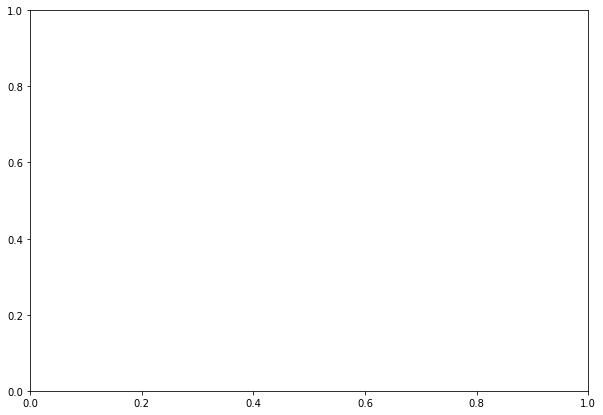

In [192]:
from YearPlotter import YearPlotter
fig, ax = plt.subplots(figsize=(10,7));
YP=YearPlotter()
YP.plot(temp[:2,:].transpose(),fig,ax,title='TMAX')

In [165]:
test2=np.float64(test2)

In [168]:
test2.shape

(155, 730)